In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
california_x, california_y = datasets.fetch_california_housing(return_X_y=True)

In [23]:
print(california_x.shape)
print(california_y.shape)

(20640, 8)
(20640,)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression(fit_intercept = True)

In [9]:
data_x = pd.DataFrame(california_x)
data_y = pd.DataFrame(california_y)

In [10]:
data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
    data_x, data_y, test_size=0.2, random_state=0)

In [11]:
lm.fit(data_x_opetus, data_y_opetus)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
ennustukset_opetus = lm.predict(data_x_opetus)
opetus_mse = mean_squared_error(data_y_opetus, ennustukset_opetus)
print(opetus_mse)

0.5234413607125448


In [13]:
ennustukset_validointi = lm.predict(data_x_validointi)
validointi_mse = mean_squared_error(data_y_validointi, ennustukset_validointi)
print(validointi_mse)

0.5289841670367199


In [14]:
from statsmodels.api import OLS
print(OLS(data_y_opetus,data_x_opetus).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.722e+04
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                        0.00
Time:                        11:58:58   Log-Likelihood:                         -19249.
No. Observations:               16512   AIC:                                  3.851e+04
Df Residuals:                   16504   BIC:                                  3.858e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
opetus_mse = np.zeros(10)
opetus_r2 = np.zeros(10)

validointi_mse = np.zeros(10)
validointi_r2 = np.zeros(10)

for i in range(0,10):
    data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
        data_x, data_y, test_size=0.2, random_state=689*i)
    
    lm.fit(data_x_opetus, data_y_opetus)
    
    ennustukset_opetus = lm.predict(data_x_opetus)
    opetus_mse[i] = mean_squared_error(data_y_opetus, ennustukset_opetus)
    opetus_r2[i] = r2_score(data_y_opetus, ennustukset_opetus)
    
    ennustukset_validointi = lm.predict(data_x_validointi)
    validointi_mse[i] = mean_squared_error(data_y_validointi, ennustukset_validointi)
    validointi_r2[i] = r2_score(data_y_validointi, ennustukset_validointi)

In [16]:
print(opetus_mse)
print('\n')
print(np.mean(opetus_mse))

[0.52344136 0.52068759 0.533675   0.51830551 0.52613404 0.52764838
 0.52657429 0.52765991 0.5305413  0.52366648]


0.5258333868255274


In [17]:
print(validointi_mse)
print('\n')
print(np.mean(validointi_mse))

[0.52898417 0.53954307 0.50334148 0.54892555 0.51868242 0.51110481
 0.515941   0.51144044 0.50680523 0.52744176]


0.5212209910809208


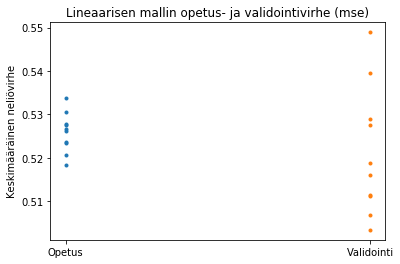

In [18]:
plt.plot(np.ones((10,1)), opetus_mse, '.')
plt.plot(2*np.ones((10,1)), validointi_mse, '.')

plt.title('Lineaarisen mallin opetus- ja validointivirhe (mse)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Keskimääräinen neliövirhe')

plt.show()

In [19]:
print(opetus_r2)
print('\n')
print(np.mean(opetus_r2))

[0.60889681 0.60488227 0.60278695 0.61049895 0.60639793 0.60447298
 0.60267561 0.60557329 0.60630199 0.60436976]


0.6056856532377892


In [20]:
print(validointi_r2)
print('\n')
print(np.mean(validointi_r2))

[0.59432327 0.61079434 0.60766565 0.58879472 0.60429769 0.6132193
 0.61953394 0.60856282 0.59989417 0.6129403 ]


0.606002619582896


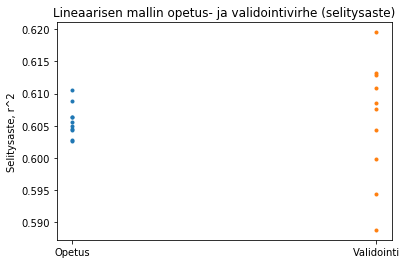

In [21]:
plt.plot(np.ones((10,1)), opetus_r2, '.')
plt.plot(2*np.ones((10,1)), validointi_r2, '.')

plt.title('Lineaarisen mallin opetus- ja validointivirhe (selitysaste)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Selitysaste, r^2')

plt.show()

In [22]:
lm.coef_

array([[ 4.36696589e-01,  9.45685745e-03, -1.04370348e-01,
         6.21279596e-01, -5.19186407e-06, -3.43201121e-03,
        -4.15480618e-01, -4.26055329e-01]])